Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Dataset Overview ===
(7789, 11)
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
me

/tmp/ipython-input-3774192289.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3774192289.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

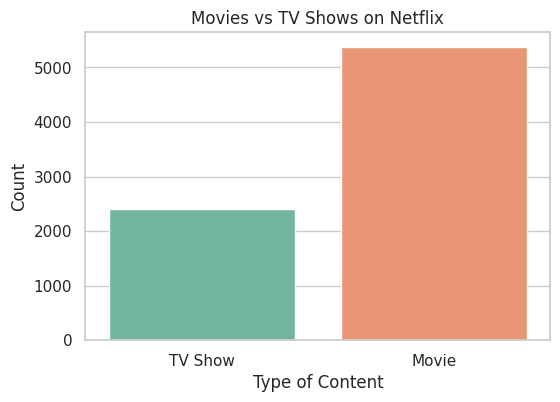

/tmp/ipython-input-3774192289.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


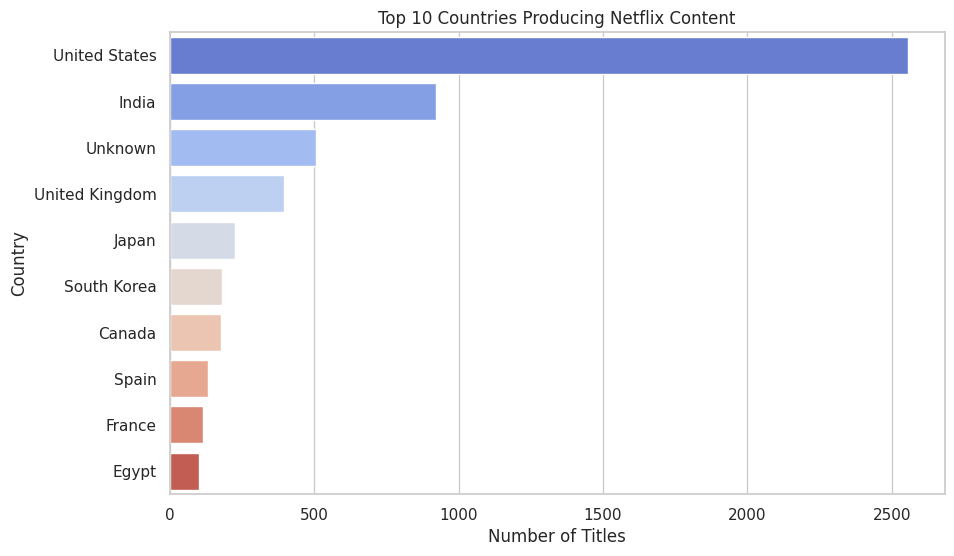

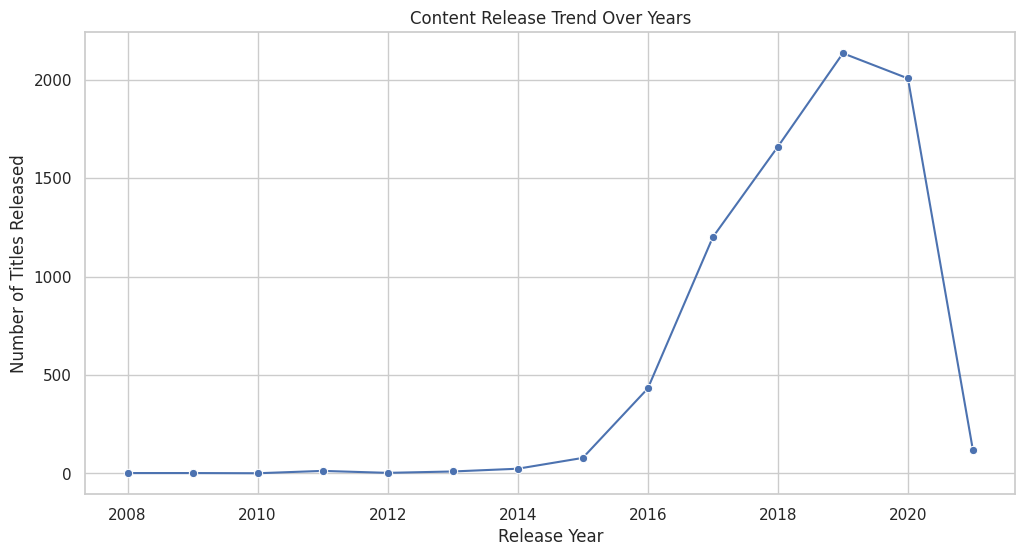

/tmp/ipython-input-3774192289.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


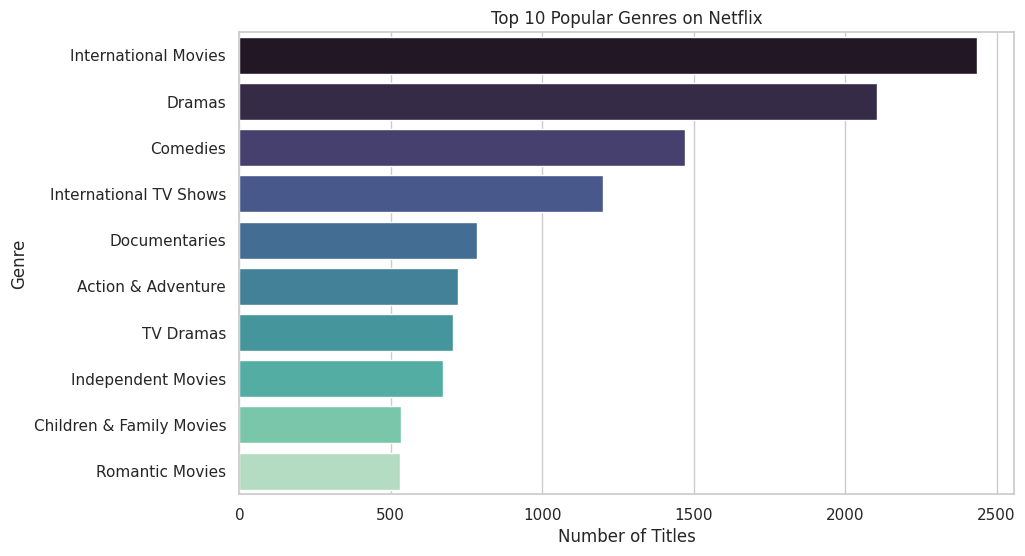

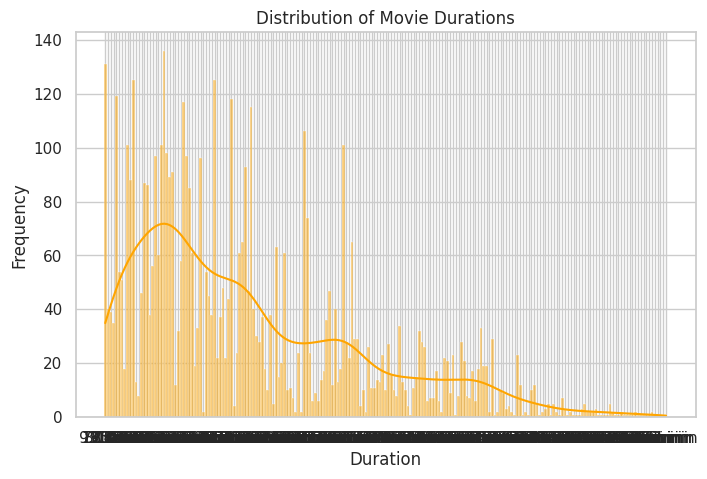

/tmp/ipython-input-3774192289.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


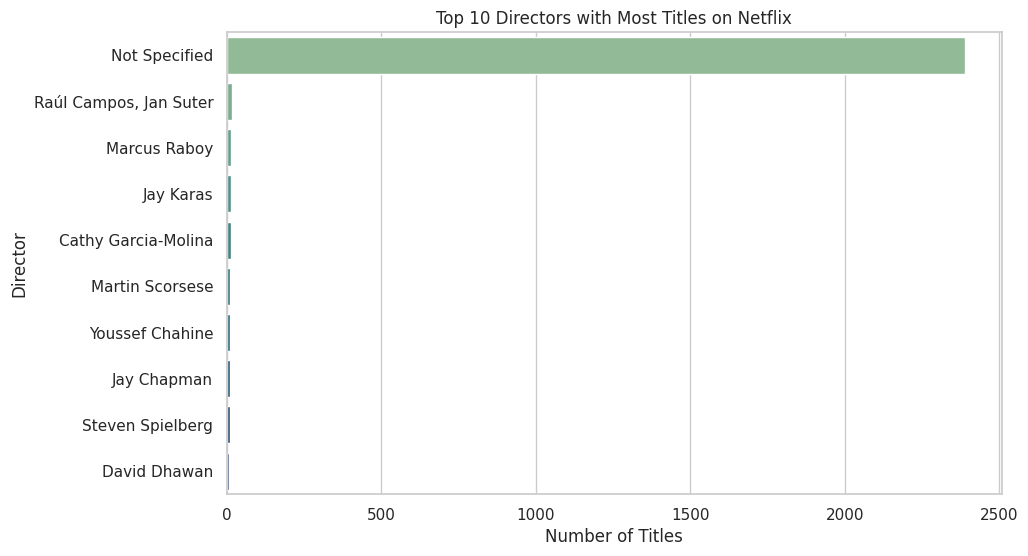

EDA Completed Successfully


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Netflix Dataset.csv'
df = pd.read_csv(file_path)

print("=== Dataset Overview ===")
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe(include='all'))
print(df.head())

print("=== Checking Missing Values ===")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Not Specified', inplace=True)
df['Cast'].fillna('Not Specified', inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

print("=== After Cleaning ===")
print(df.isnull().sum())
print(df.info())

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(12,6))
yearly_trend = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title("Content Release Trend Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.show()

if 'Listed In' in df.columns:
    genres = df['Listed In'].dropna().str.split(', ')
else:
    genres = df['Type'].dropna().str.split(', ')
all_genres = genres.explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

movies = df[df['Category'] == 'Movie']
plt.figure(figsize=(8,5))
sns.histplot(movies['Duration'], bins=20, kde=True, color='orange')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

print("EDA Completed Successfully")
